In [1]:
import pandas as pd

# Load your datasets
data = pd.read_excel('../../data/globalterrorismdb_0522dist.xlsx')
data_ppl_year = pd.read_csv('../../data/processed/ppl_country_years.csv')


In [2]:
data_copy = data.copy()
data_ppl_year_copy = data_ppl_year.copy()

# Get the unique country lists
country_list_1 = data_copy['country_txt'].unique()
country_list_2 = data_ppl_year_copy['Country Name'].unique()



# Convert to sets for comparison
set_1 = set(country_list_1)
set_2 = set(country_list_2)

# Find common countries
common_countries = set_1.intersection(set_2)

# Find countries unique to each dataset
unique_to_set_1 = set_1 - set_2
unique_to_set_2 = set_2 - set_1


print("Unique to first dataset:", unique_to_set_1)
print('number of unique countries in data:', len(unique_to_set_1))

Unique to first dataset: {'Taiwan', 'Syria', 'Ivory Coast', 'Laos', 'Soviet Union', 'Macau', 'East Germany (GDR)', 'Vietnam', 'West Bank and Gaza Strip', 'Kyrgyzstan', 'Russia', 'East Timor', 'Wallis and Futuna', 'New Hebrides', 'Bosnia-Herzegovina', 'International', 'Rhodesia', 'Falkland Islands', 'Macedonia', 'Brunei', 'Egypt', 'Hong Kong', 'Turkey', 'Bahamas', 'Serbia-Montenegro', 'Guadeloupe', 'Democratic Republic of the Congo', 'Vatican City', 'Republic of the Congo', 'Iran', 'Yemen', 'Czechoslovakia', 'Martinique', 'Western Sahara', 'West Germany (FRG)', 'Yugoslavia', 'French Guiana', 'North Yemen', 'North Korea', 'Swaziland', 'Gambia', "People's Republic of the Congo", 'Czech Republic', 'South Korea', 'South Yemen', 'Venezuela', 'Zaire'}
number of unique countries in data: 47


In [3]:
# Dictionnaire de correspondance pour les pays qui diffèrent entre les deux datasets
with open('corrections.json', 'r') as file:
    corrections = json.load(file)

# Appliquer les corrections aux données du premier dataset
data_copy['country_txt'] = data_copy['country_txt'].replace(corrections)

# Réexécuter la comparaison après correction
country_list_1 = data_copy['country_txt'].unique()
set_1 = set(country_list_1)
common_countries = set_1.intersection(set_2)
unique_to_set_1 = set_1 - set_2

print("Unique to first dataset after correction:", unique_to_set_1)
print('Number of unique countries in data after correction:', len(unique_to_set_1))


Unique to first dataset after correction: {'Taiwan', 'Macau', 'New Hebrides', 'Wallis and Futuna', 'Falkland Islands', 'International', 'Rhodesia', 'Egypt', 'Guadeloupe', 'Vatican City', 'Slovakia', 'Republic of the Congo', 'Martinique', 'Western Sahara', 'Yugoslavia', 'French Guiana', 'North Yemen', 'Swaziland', "People's Republic of the Congo", 'South Yemen', 'Zaire'}
Number of unique countries in data after correction: 21


In [4]:
"""
Example matching GTD and population
    - Attack in france, from 2000 to 2017
"""

# Get the population of France from 2000 to 2017
france_population = data_ppl_year_copy[data_ppl_year_copy['Country Name'] == 'France']
# keep only the years from 2000 to 2017
france_population.columns = france_population.columns.astype(str)
france_population = france_population[['Country Name'] + [str(i) for i in range(2000, 2018)]]
france_population = france_population.melt(id_vars='Country Name', var_name='year', value_name='population')
france_population



,Country Name,year,population
0,France,2000,60921384.0
1,France,2001,61367388.0
2,France,2002,61816234.0
3,France,2003,62256970.0
4,France,2004,62716306.0
5,France,2005,63188395.0
6,France,2006,63628261.0
7,France,2007,64021737.0
8,France,2008,64379696.0
9,France,2009,64710879.0


In [5]:
# Get the attacks in France from 2000 to 2017
france_attacks = data_copy[data_copy['country_txt'] == 'France']
france_attacks = france_attacks[france_attacks['iyear'].between(2000, 2017)]
france_attacks

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
69930,200001130003,2000,1,13,NaN,0,NaT,69,France,8,...,NaN,“France: Bomb Attack Damages Tax Office in Nor...,NaN,NaN,CETIS,-9,-9,0,-9,NaN
70167,200003110001,2000,3,11,NaN,0,NaT,69,France,8,...,"According to initial investigations, the explo...",“Explosive Device Damages Tax Office in Britta...,“ETA Explosives Used in Breton Separatist Atta...,NaN,CETIS,0,0,0,0,NaN
70234,200004010003,2000,4,1,NaN,0,NaT,69,France,8,...,NaN,“French Gas Station Attacked by Molotov Cockta...,NaN,NaN,CETIS,-9,-9,0,-9,NaN
70296,200004150004,2000,4,15,NaN,0,NaT,69,France,8,...,NaN,“France: Bomb Attack Believed Committed By Bas...,“French Basque Group Claims Responsibility for...,NaN,CETIS,0,1,0,1,NaN
70298,200004150006,2000,4,15,NaN,0,NaT,69,France,8,...,NaN,“France: Explosive Attack on Discotheque in Co...,NaN,NaN,CETIS,-9,-9,0,-9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180454,201710010010,2017,10,1,NaN,0,NaT,69,France,8,...,NaN,"""Marseille: Fatal Knife Attack at Train Statio...","""Two dead in knife attack at France's Marseill...","""Washington - Islamic State group claims respo...",START Primary Collection,-9,-9,0,-9,NaN
180578,201710050022,2017,10,5,NaN,0,NaT,69,France,8,...,NaN,"""Revision: Paris - French cement-maker targete...","""Explosives found under LafargeHolcim cement t...","""Lorries of firm in Syria civil war row may ha...",START Primary Collection,-9,-9,0,-9,NaN
180886,201710160034,2017,10,16,NaN,0,NaT,69,France,8,...,NaN,"""Russian Artist Is Charged Over Fire at Centra...","""Petr Pavlensky: Russian who released Macron a...",NaN,START Primary Collection,-9,-9,0,-9,NaN
181135,201710260021,2017,10,26,NaN,0,NaT,69,France,8,...,NaN,"""Cars Torched in Attack on French Police Housi...","""Europe News Highlights 2 November 2017,"" Summ...","""French Prosecutor: Arson Attack on Gendarmes'...",START Primary Collection,-9,-9,0,-9,NaN


In [6]:
# Get the number of attacks by year in France and the population

france_attacks_by_year = france_attacks['iyear'].value_counts().sort_index()
france_attacks_by_year = france_attacks_by_year.reset_index()
france_attacks_by_year = france_attacks_by_year.rename(columns={'index': 'year', 'iyear': 'Year'})
france_attacks_by_year

,Year,count
0,2000,28
1,2001,21
2,2002,32
3,2003,34
4,2004,11
5,2005,33
6,2006,34
7,2007,16
8,2008,13
9,2009,9


In [7]:
# add the population from france_population df

france_attacks_by_year['population'] = france_population['population'].values
france_attacks_by_year

,Year,count,population
0,2000,28,60921384.0
1,2001,21,61367388.0
2,2002,32,61816234.0
3,2003,34,62256970.0
4,2004,11,62716306.0
5,2005,33,63188395.0
6,2006,34,63628261.0
7,2007,16,64021737.0
8,2008,13,64379696.0
9,2009,9,64710879.0


In [8]:
# add a ratio column to see the number of attacks by population

france_attacks_by_year['ratio'] = france_attacks_by_year['Year'] / france_attacks_by_year['population']
france_attacks_by_year

,Year,count,population,ratio
0,2000,28,60921384.0,0.000033
1,2001,21,61367388.0,0.000033
2,2002,32,61816234.0,0.000032
3,2003,34,62256970.0,0.000032
4,2004,11,62716306.0,0.000032
5,2005,33,63188395.0,0.000032
6,2006,34,63628261.0,0.000032
7,2007,16,64021737.0,0.000031
8,2008,13,64379696.0,0.000031
9,2009,9,64710879.0,0.000031


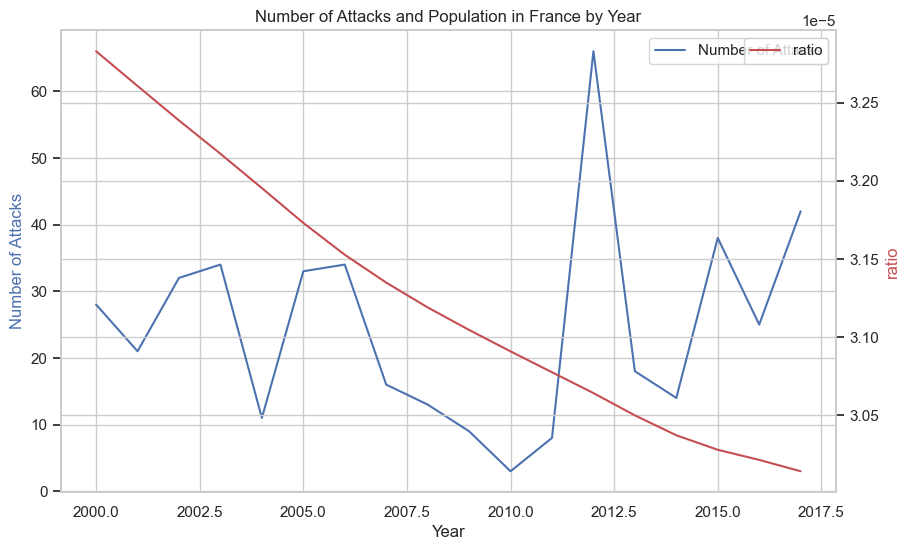

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the number of attacks by year
sns.lineplot(x='Year', y='count', data=france_attacks_by_year, ax=ax1, label='Number of Attacks', color='b')

# Create a second y-axis to plot the population
ax2 = ax1.twinx()  
sns.lineplot(x='Year', y='ratio', data=france_attacks_by_year, ax=ax2, label='ratio', color='r')

# Labeling
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Attacks', color='b')
ax2.set_ylabel('ratio', color='r')


# Adding a title
plt.title('Number of Attacks and Population in France by Year')

# Show plot
plt.show()


In [11]:
# now generalise with all countries

# Get the number of attacks by year by country
attacks_by_year = data_copy.groupby(['country_txt', 'iyear']).size().reset_index(name='count')
attacks_by_year

,country_txt,iyear,count
0,Afghanistan,1973,1
1,Afghanistan,1979,3
2,Afghanistan,1987,1
3,Afghanistan,1988,11
4,Afghanistan,1989,10
...,...,...,...
4049,Zimbabwe,2014,1
4050,Zimbabwe,2017,3
4051,Zimbabwe,2018,2
4052,Zimbabwe,2019,2


In [12]:
# Melt the wide-format population data into a long-format DataFrame
data_ppl_year_copy_melted = data_ppl_year_copy.melt(id_vars=['Country Name'], 
                                                    var_name='Year', 
                                                    value_name='Population')

# Convert 'Year' to integer for merging consistency
data_ppl_year_copy_melted['Year'] = data_ppl_year_copy_melted['Year'].astype(int)

# Merge attacks_by_year with the melted population data
attacks_by_year = attacks_by_year.merge(data_ppl_year_copy_melted, 
                                        left_on=['country_txt', 'iyear'], 
                                        right_on=['Country Name', 'Year'], 
                                        how='left')

attacks_by_year


,country_txt,iyear,count,Country Name,Year,Population
0,Afghanistan,1973,1,Afghanistan,1973.0,11575305.0
1,Afghanistan,1979,3,Afghanistan,1979.0,12986369.0
2,Afghanistan,1987,1,Afghanistan,1987.0,10322758.0
3,Afghanistan,1988,11,Afghanistan,1988.0,10383460.0
4,Afghanistan,1989,10,Afghanistan,1989.0,10673168.0
...,...,...,...,...,...,...
4049,Zimbabwe,2014,1,Zimbabwe,2014.0,13855753.0
4050,Zimbabwe,2017,3,Zimbabwe,2017.0,14751101.0
4051,Zimbabwe,2018,2,Zimbabwe,2018.0,15052184.0
4052,Zimbabwe,2019,2,Zimbabwe,2019.0,15354608.0


In [13]:
# add the rtio column 
attacks_by_year['ratio'] = attacks_by_year['count'] / attacks_by_year['Population']
attacks_by_year

,country_txt,iyear,count,Country Name,Year,Population,ratio
0,Afghanistan,1973,1,Afghanistan,1973.0,11575305.0,8.639081e-08
1,Afghanistan,1979,3,Afghanistan,1979.0,12986369.0,2.310115e-07
2,Afghanistan,1987,1,Afghanistan,1987.0,10322758.0,9.687334e-08
3,Afghanistan,1988,11,Afghanistan,1988.0,10383460.0,1.059377e-06
4,Afghanistan,1989,10,Afghanistan,1989.0,10673168.0,9.369289e-07
...,...,...,...,...,...,...,...
4049,Zimbabwe,2014,1,Zimbabwe,2014.0,13855753.0,7.217219e-08
4050,Zimbabwe,2017,3,Zimbabwe,2017.0,14751101.0,2.033746e-07
4051,Zimbabwe,2018,2,Zimbabwe,2018.0,15052184.0,1.328711e-07
4052,Zimbabwe,2019,2,Zimbabwe,2019.0,15354608.0,1.302541e-07


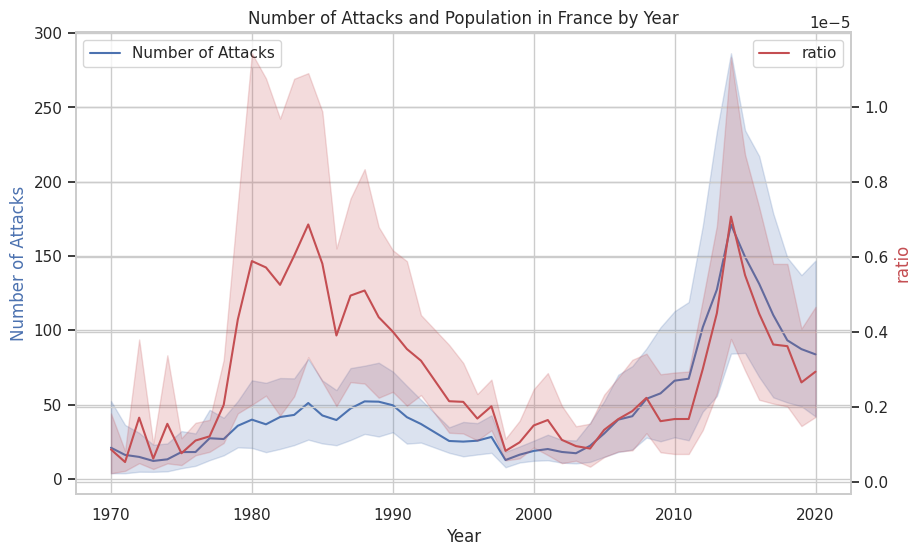

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the number of attacks by year
sns.lineplot(x='Year', y='count', data=attacks_by_year, ax=ax1, label='Number of Attacks', color='b')

# Create a second y-axis to plot the population
ax2 = ax1.twinx()  
sns.lineplot(x='Year', y='ratio', data=attacks_by_year, ax=ax2, label='ratio', color='r')

# Labeling
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Attacks', color='b')
ax2.set_ylabel('ratio', color='r')


# Adding a title
plt.title('Number of Attacks and Population in France by Year')

# Show plot
plt.show()


In [25]:
# look for the highest ratio
highest_ratio = attacks_by_year.groupby('country_txt')['ratio'].max()
highest_ratio = highest_ratio.sort_values(ascending=False)
highest_ratio

country_txt
El Salvador           0.000157
Libya                 0.000120
Iraq                  0.000107
Nicaragua             0.000083
West Bank and Gaza    0.000076
                        ...   
Vatican City               NaN
Wallis and Futuna          NaN
Western Sahara             NaN
Yugoslavia                 NaN
Zaire                      NaN
Name: ratio, Length: 199, dtype: float64